## ÖDEV-7
## Öğrenci No: 171024086
## Öğrenci Adı ve Soyadı: Berat KIZILARMUT
____________________________________________________________________________________________________________________________

### Ön hazırlık dosyasında verilen kodlar

In [2]:
# Kütüphane importlanması

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fftpack import fft, ifft
%matplotlib notebook
from scipy.io import loadmat

***

## Ornek2.pdf

In [3]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook
# WE NEED TO IMPORT THE CUSTOM (USER DEFINED) FUNCTION AS WELL, IN ORDER TO USE IT!!!
import SystemFunction

<IPython.core.display.Javascript object>


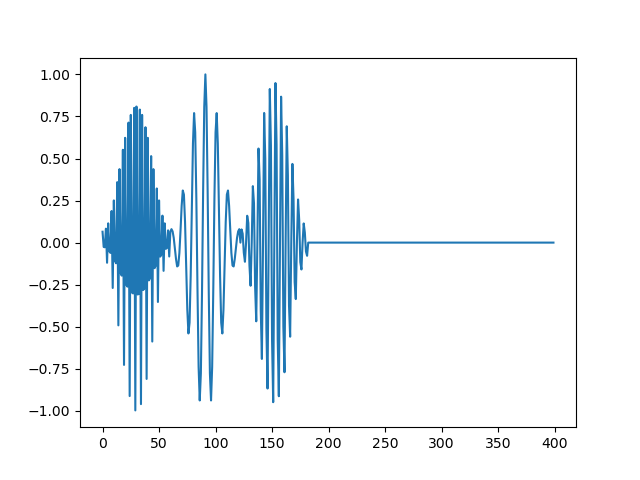

In [4]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency components)
n = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)
plt.figure()
plt.plot(xn)

In [5]:
# Calculate the Fourier transform of xn
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

<IPython.core.display.Javascript object>


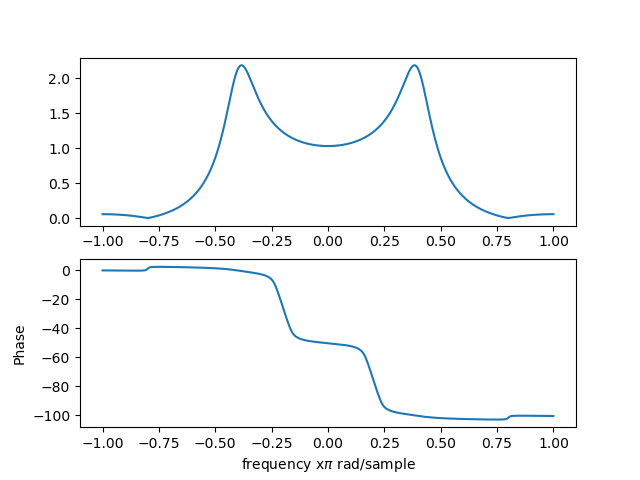

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [6]:
Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('Phase')
plt.xlabel('frequency x$\pi$ rad/sample')

In [7]:
# calculate the group delay of the system:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

In [8]:
Yw_shifted = Hw * Xw_shifted # we multiply the frequency response of the system with the **shifted** Fourier transform of the signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw)) # we calculate the inverse fft and take the real component (because of numerical consistency)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

<IPython.core.display.Javascript object>

***

## Ornek3.pdf

In [9]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook

<IPython.core.display.Javascript object>


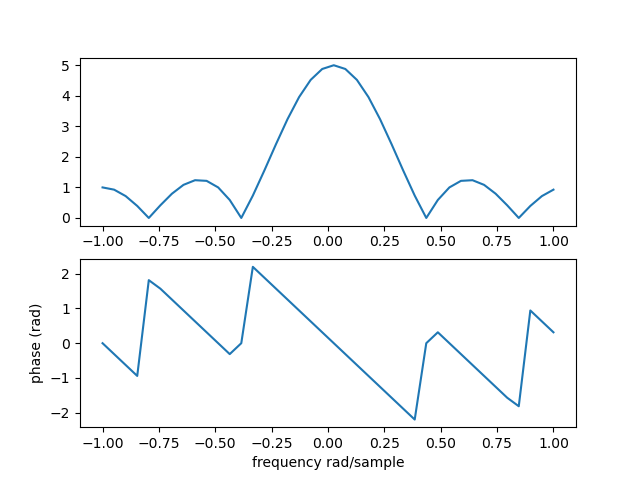

([<matplotlib.lines.Line2D at 0x1d681c73d00>],
 Text(0, 0.5, 'phase (rad)'),
 Text(0.5, 0, 'frequency rad/sample'))

In [10]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))
w = np.linspace(-np.pi, np.pi, N)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('phase (rad)'), plt.xlabel('frequency rad/sample')

<IPython.core.display.Javascript object>


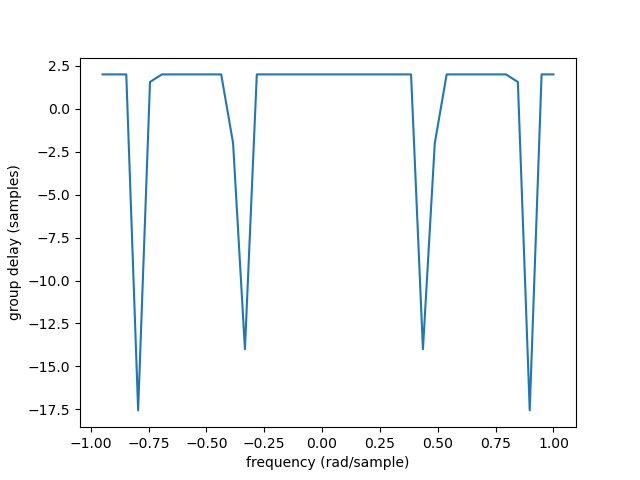

Text(0, 0.5, 'group delay (samples)')

In [11]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [12]:
n = np.arange(0, N, 1) # first create the index vector at N points
w0 = 0.1*np.pi # frequency of the input signal
xn = np.cos(w0*n) # create the input signal at w0
Xw = np.fft.fftshift(fft(xn, N)) # compute the frequency response (in the [-pi pi] interval)
Yw_shifted = Hw * Xw # compute the fft of the output signal
Yw = np.fft.ifftshift(Yw_shifted) # we shifted back to the 0-2*pi interval
yn = np.real(ifft(Yw))

<IPython.core.display.Javascript object>


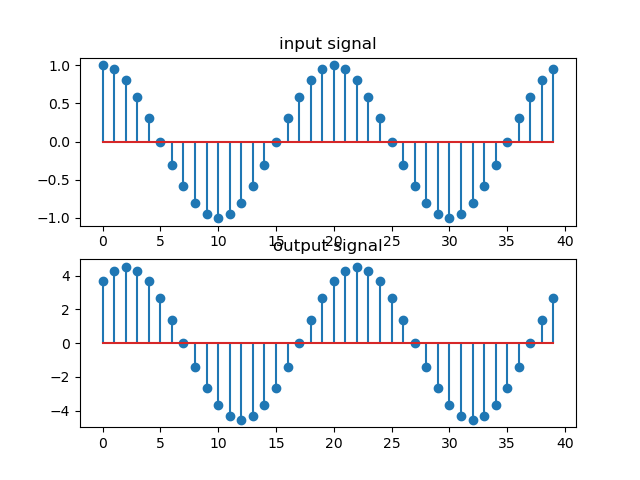

(<StemContainer object of 3 artists>, None)

In [13]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text('input signal')
ax2.stem(n, yn), ax2.title.set_text('output signal')

***

## Ornek4.pdf

In [14]:
# As usual, we begin with importing necessary libraries and functions
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook
# to read .csv data file
from scipy.io import loadmat

In [15]:
# importing an IIR filter
filter_data = loadmat('butterworth.mat') # load the filter obtained from pyfda
Coeffs = filter_data['ba'].astype(np.float) # get the coefficients and convert them to float (from string)
b = Coeffs[:,0] # first column is b
a = Coeffs[:,1] # second column is a (only if the filter is IIR)

<IPython.core.display.Javascript object>


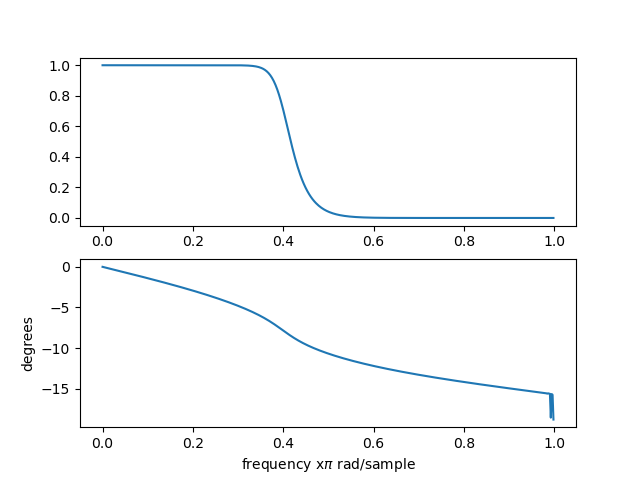

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [16]:
w, Hw = sgnl.freqz(b,a)
Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

<IPython.core.display.Javascript object>


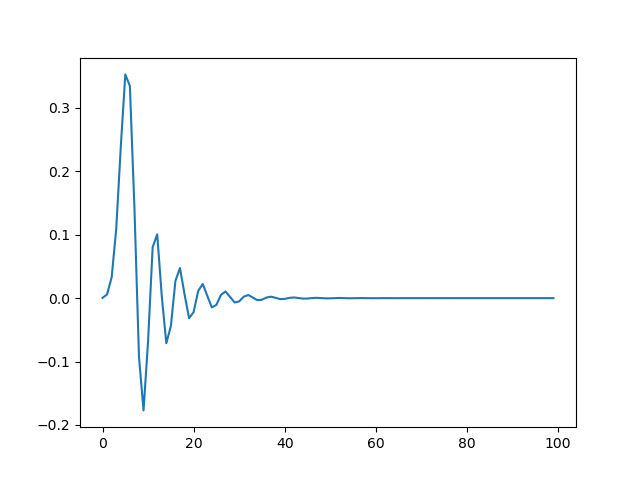

In [17]:
n, hn = sgnl.dimpulse((b,a,1), n=100) # compute the impulse response for 100 points
plt.figure()
plt.plot(n, np.squeeze(hn))

<IPython.core.display.Javascript object>


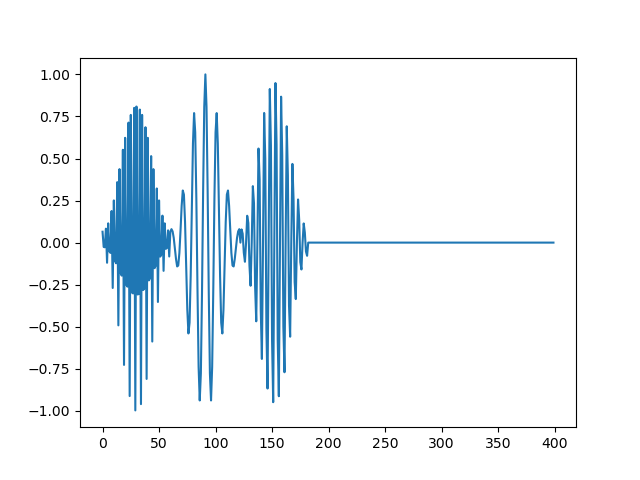

In [18]:
# Generate the individual components and the input signal
N = 400 # total number of samples in the input signal
M = 60 # size of the window function (and sample length of the frequency components)
n1 = np.arange(0, M+1, 1) # index vector of M+1 points
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M) # window function (Hamming window)
# the components
x1 = wn*np.cos(0.2*np.pi*n1) # component with w1 = 0.2*pi frequency
x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2) # component with w1 = 0.4*pi frequency
x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5) # component with w1 = 0.8*pi frequency
xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis=None)
plt.figure()
plt.plot(xn)

<IPython.core.display.Javascript object>


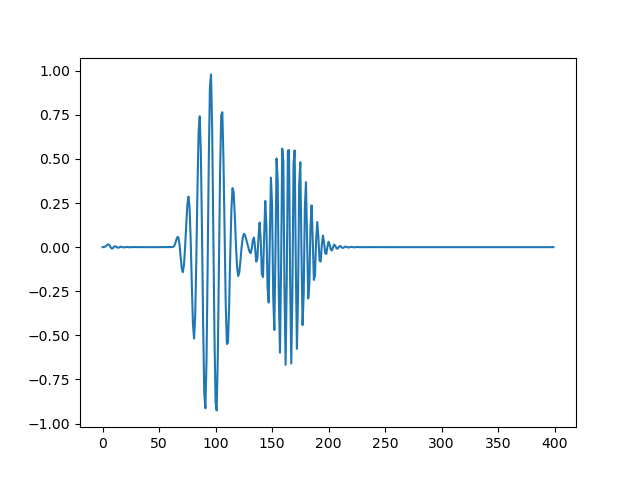

In [19]:
yn = sgnl.lfilter(b, a, xn) # using the coefficients, we applied the signal to the input of the filter.
plt.figure()
plt.plot(yn)

***

***

# Soru - 1

In [20]:
N = 100 # Örnek Sayısı Belirlendi
w = np.linspace(0, 2*np.pi, N) # Açısal Frekans Aralığı [0, 2pi] Belirlendi

<IPython.core.display.Javascript object>


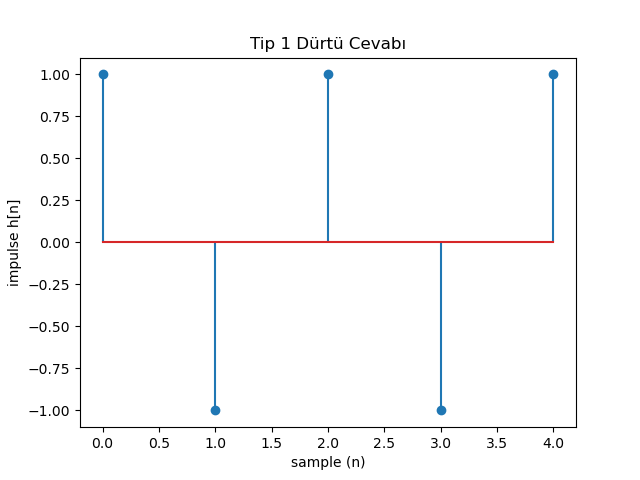

<IPython.core.display.Javascript object>


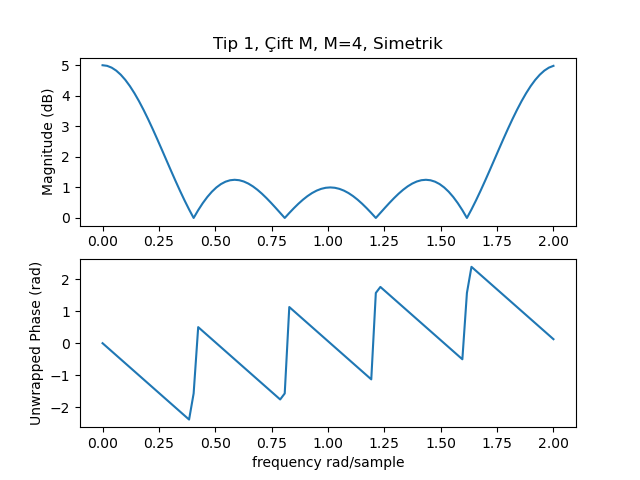

<IPython.core.display.Javascript object>


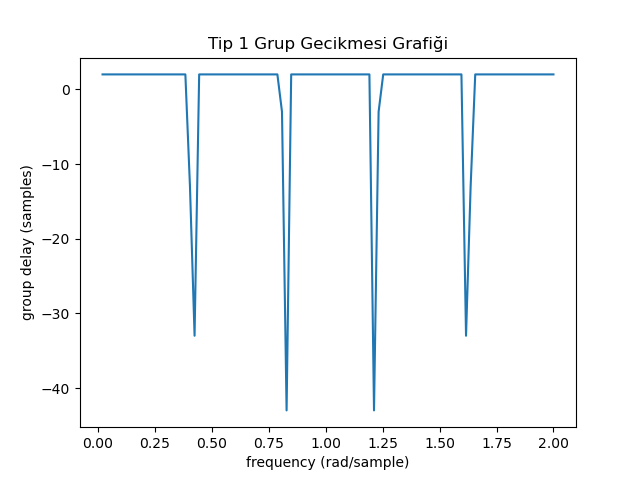

Text(0, 0.5, 'group delay (samples)')

In [21]:
# Type1 için
h_type1 = np.array([1,-1,1,-1,1]) # Tip 1, Çift M, M=4, Simetrik
n_type1 = np.arange(0, 5, 1) # Dürtü örnek miktarı oluşturuldu
Hw1 = np.fft.fftshift(fft(h_type1, N)) # Dürtünün fourier transformu alındı
# Genlik ve Faz değerleri atandı (Faz unwrapped olarak alındı)
Hw1_mag = abs(Hw1)
Hw1_phs = np.unwrap(np.angle(Hw1))
tau1 = -np.diff(Hw1_phs)*(N/(2*np.pi))

# Grafikler Çizdirildi
# Dürtü Grafiği
plt.figure()
plt.title('Tip 1 Dürtü Cevabı')
plt.stem(n_type1, h_type1)
plt.xlabel('sample (n)')
plt.ylabel('impulse h[n]')
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('Tip 1, Çift M, M=4, Simetrik')
plt.plot(w/np.pi, Hw1_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw1_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Gecikme Grafiği
plt.figure()
plt.title('Tip 1 Grup Gecikmesi Grafiği')
plt.plot(w[1::]/np.pi, tau1)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')


### Genlik grafiğine bakarak, grafiğin normalde alışık olduğumuz -pi pi aralığında değil de, 0 2pi aralığında olduğunu göz önünde bulundurarak; alçak frekanslardaki değerlerin geçtiğini, yüksek frekanslardaki değerlerin söndüğünü gözlemleriz. Alçak Geçiren Filtredir.
### Filtre lineer fazlı, grup gecikmesi sabittir.

<IPython.core.display.Javascript object>


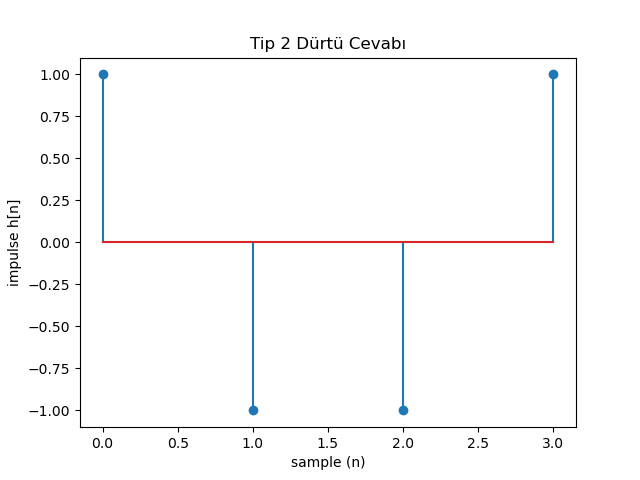

<IPython.core.display.Javascript object>


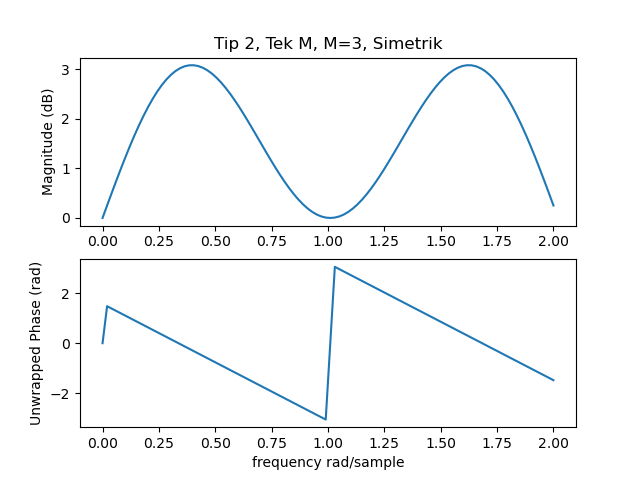

<IPython.core.display.Javascript object>


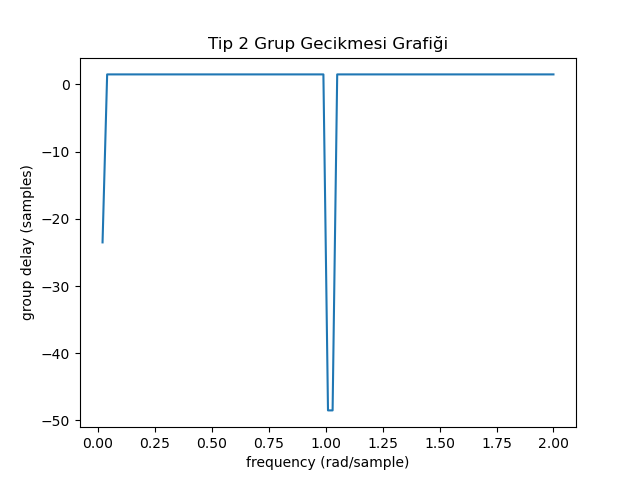

Text(0, 0.5, 'group delay (samples)')

In [22]:
# Type2 İçin
h_type2 = np.array([1,-1,-1,1]) # Tip 2, Tek M, M=3, Simetrik
n_type2 = np.arange(0, 4, 1) # Dürtü örnek miktarı oluşturuldu
Hw2 = np.fft.fftshift(fft(h_type2, N)) # Dürtünün fourier transformu alındı
# Genlik ve Faz değerleri atandı (Faz unwrapped olarak alındı)
Hw2_mag = abs(Hw2)
Hw2_phs = np.unwrap(np.angle(Hw2))
tau2 = -np.diff(Hw2_phs)*(N/(2*np.pi))

# Grafikler Çizdirildi
# Dürtü Grafiği
plt.figure()
plt.title('Tip 2 Dürtü Cevabı')
plt.stem(n_type2, h_type2)
plt.xlabel('sample (n)')
plt.ylabel('impulse h[n]')
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('Tip 2, Tek M, M=3, Simetrik')
plt.plot(w/np.pi, Hw2_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw2_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Gecikme Grafiği
plt.figure()
plt.title('Tip 2 Grup Gecikmesi Grafiği')
plt.plot(w[1::]/np.pi, tau2)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

### Genlik grafiğine bakarak, grafiğin normalde alışık olduğumuz -pi pi aralığında değil de, 0 2pi aralığında olduğunu göz önünde bulundurarak; belirli bir aralıkta frekansların geçtiğin, diğerlerinin söndüğü gözlenir. Bant Geçiren Filtredir.
### Filtre lineer fazlı, grup gecikmesi sabittir.

<IPython.core.display.Javascript object>


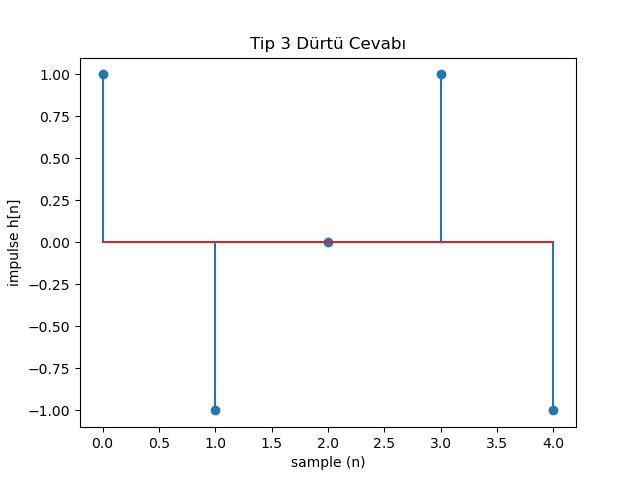

<IPython.core.display.Javascript object>


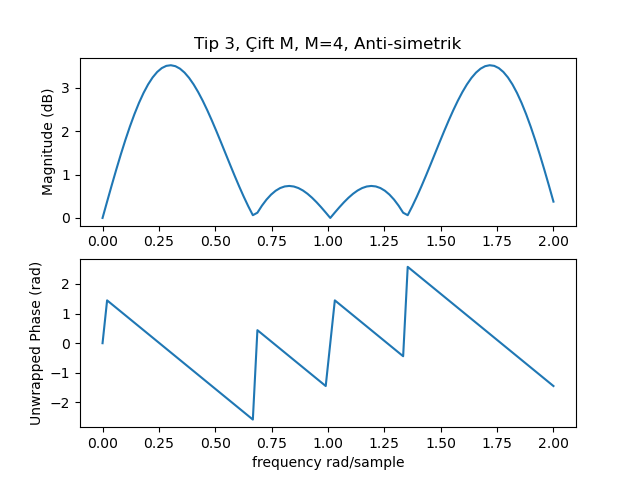

<IPython.core.display.Javascript object>


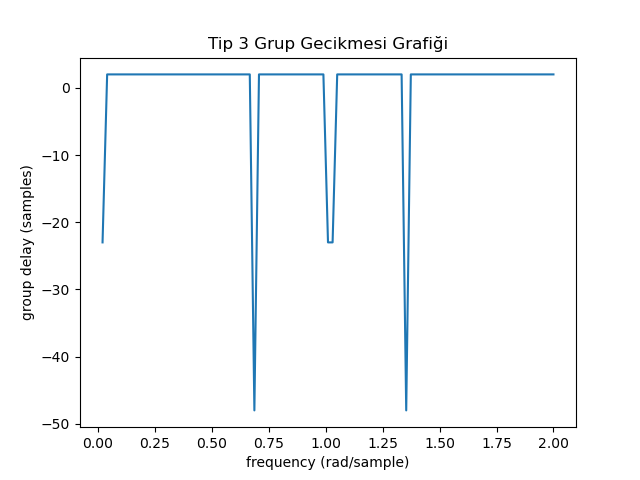

Text(0, 0.5, 'group delay (samples)')

In [23]:
# Type3 İçin
h_type3 = np.array([1,-1,0,1,-1]) # Tip 3, Çift M, M=4, Anti-simetrik
n_type3 = np.arange(0, 5, 1) # Dürtü örnek miktarı oluşturuldu
Hw3 = np.fft.fftshift(fft(h_type3, N)) # Dürtünün fourier transformu alındı
# Genlik ve Faz değerleri atandı (Faz unwrapped olarak alındı)
Hw3_mag = abs(Hw3)
Hw3_phs = np.unwrap(np.angle(Hw3))
tau3 = -np.diff(Hw3_phs)*(N/(2*np.pi))

# Grafikler Çizdirildi
# Dürtü Grafiği
plt.figure()
plt.title('Tip 3 Dürtü Cevabı')
plt.stem(n_type3, h_type3)
plt.xlabel('sample (n)')
plt.ylabel('impulse h[n]')
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('Tip 3, Çift M, M=4, Anti-simetrik')
plt.plot(w/np.pi, Hw3_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw3_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Gecikme Grafiği
plt.figure()
plt.title('Tip 3 Grup Gecikmesi Grafiği')
plt.plot(w[1::]/np.pi, tau3)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

### Genlik grafiğine bakarak, grafiğin normalde alışık olduğumuz -pi pi aralığında değil de, 0 2pi aralığında olduğunu göz önünde bulundurarak; belirli bir aralıkta frekansların geçtiğin, diğerlerinin söndüğü gözlenir. Bant Geçiren Filtredir.
### Tip2'de bulunan filtre de bant geçiren filtre olmaktaydı, fakat grafikleri aynı görünüşe sahip değil. Bu durumun sebebi bant geçiren filtrenin aralığı olabilir.
### Filtre lineer fazlı, grup gecikmesi sabittir.

<IPython.core.display.Javascript object>


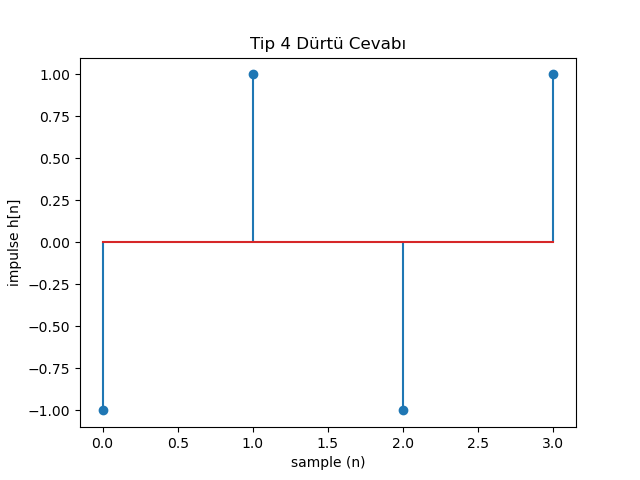

<IPython.core.display.Javascript object>


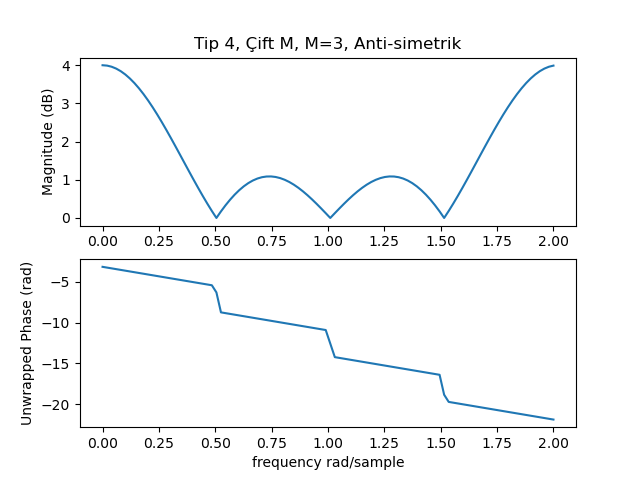

<IPython.core.display.Javascript object>


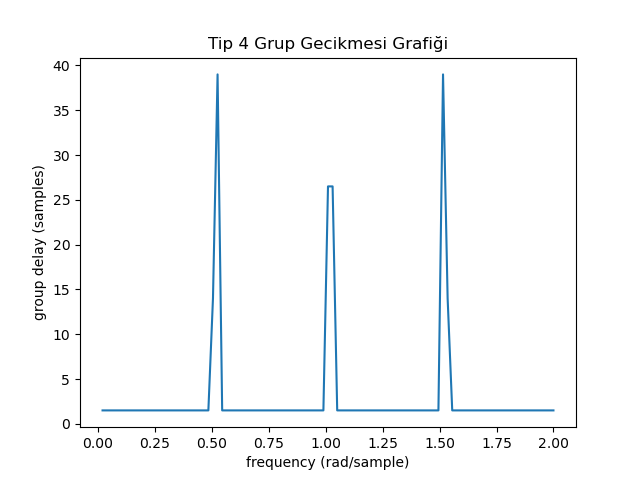

Text(0, 0.5, 'group delay (samples)')

In [24]:
# Type4 İçin
h_type4 = np.array([-1,1,-1,1]) # Tip 4, Çift M, M=3, Anti-simetrik
n_type4 = np.arange(0, 4, 1) # Dürtü örnek miktarı oluşturuldu
Hw4 = np.fft.fftshift(fft(h_type4, N)) # Dürtünün fourier transformu alındı
# Genlik ve Faz değerleri atandı (Faz unwrapped olarak alındı)
Hw4_mag = abs(Hw4)
Hw4_phs = np.unwrap(np.angle(Hw4))
tau4 = -np.diff(Hw4_phs)*(N/(2*np.pi))

# Grafikler Çizdirildi
# Dürtü Grafiği
plt.figure()
plt.title('Tip 4 Dürtü Cevabı')
plt.stem(n_type4, h_type4)
plt.xlabel('sample (n)')
plt.ylabel('impulse h[n]')
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('Tip 4, Çift M, M=3, Anti-simetrik')
plt.plot(w/np.pi, Hw4_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w/np.pi, Hw4_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Gecikme Grafiği
plt.figure()
plt.title('Tip 4 Grup Gecikmesi Grafiği')
plt.plot(w[1::]/np.pi, tau4)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

### Genlik grafiğine bakarak, grafiğin normalde alışık olduğumuz -pi pi aralığında değil de, 0 2pi aralığında olduğunu göz önünde bulundurarak; alçak frekanslardaki değerlerin geçtiğini, yüksek frekanslardaki değerlerin söndüğünü gözlemleriz. Bu filtre de, Tip1 gibi Alçak Geçiren Filtredir.
### Filtre lineer fazlı, grup gecikmesi sabittir.

***

***

# Soru - 2

### FIR Bant Geçiren Filtre, Barthann Metodu, N = 42
#### b ve a değerleri olmadığı için pyfdax'dan pole zero diagramı alındı

<IPython.core.display.Javascript object>


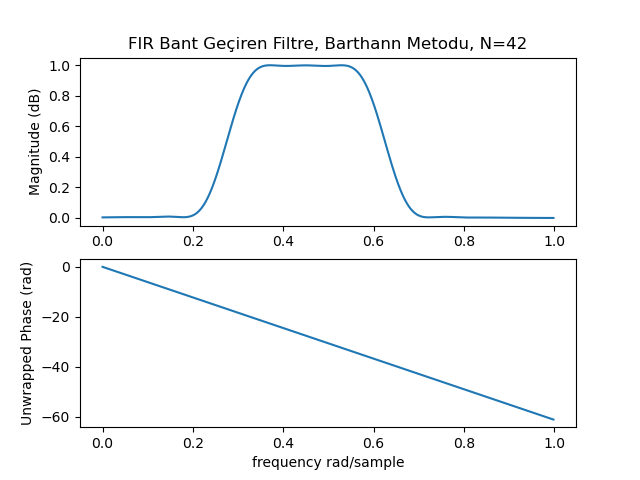

<IPython.core.display.Javascript object>


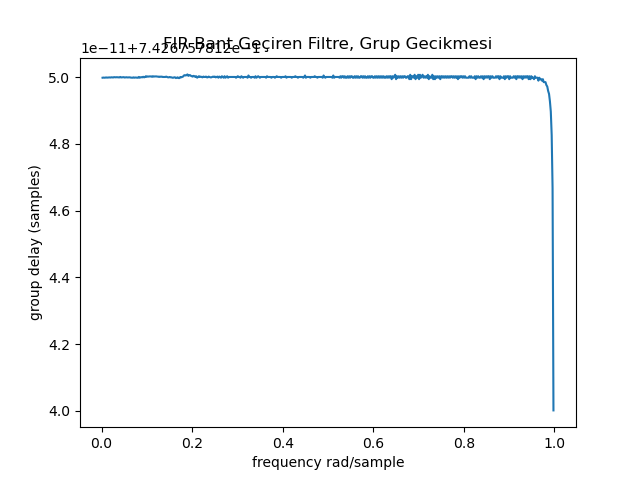

Text(0.5, 0, 'frequency rad/sample')

In [82]:
FIR_BPF = loadmat('Soru2_BPF_Barthann') # Pyfdax'dan alınan bilgiler açıldı
coef_FIR_BPF = FIR_BPF['zpk'].astype(complex) # Coefficientlar alındı
p_FIR_BPF = coef_FIR_BPF[0] # İlk array değerleri p'ye
z_FIR_BPF = coef_FIR_BPF[1] # İkinci array değerleri z'ye atandı

# Fourier dönüşümü ve açısal frekans belirlendi
w_FIR_BPF, Hw_FIR_BPF = sgnl.freqz_zpk(p_FIR_BPF,z_FIR_BPF, 0.000390942)
# Genlik ve Faz değerleri atandı
Hw_FIR_BPF_mag = abs(Hw_FIR_BPF)
Hw_FIR_BPF_phs = np.unwrap(np.angle(Hw_FIR_BPF))

# Grup gecikmesi belirlendi
N_FIR_BPF = 39
tau_FIR_BPF = -np.diff(Hw_FIR_BPF_phs)*(N_FIR_BPF/(2*np.pi))

# Grafikler Çizdirildi
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('FIR Bant Geçiren Filtre, Barthann Metodu, N=42')
plt.plot(w_FIR_BPF/np.pi, Hw_FIR_BPF_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w_FIR_BPF/np.pi, Hw_FIR_BPF_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Grup Gecikmesi Grafiği
plt.figure()
plt.title('FIR Bant Geçiren Filtre, Grup Gecikmesi')
plt.plot(w_FIR_BPF[1::]/np.pi, tau_FIR_BPF)
plt.ylabel('group delay (samples)')
plt.xlabel('frequency rad/sample')

#### Oluşturulan filtre, pyfdax'da gözlenildiği gibi burada da bant geçiren filtre şeklini almıştır. Kesim frekansı ve bant genişliği değerlerinin 0.3pi olması istenilmişti. Bu durumu oluşturmak için alt indisi omega/2pi olan pyfdax'da kesim frekansı ve genişlik değerlerini '0.15' birim olarak ayarlamıştım. Ayarlarımı böyle yaptığım için w/pi indisine ayarlandığında kesim noktası ve genişlik istenildiği gibi 0.3pi oldu. 0.3 pi'de kesmeye başladı, 0.3pi genişliğinde bant oluştu, 0.6pi değerinde ikinci kesim frekansı oldu.
#### Faz ve genlik grafikleri programdakiyle birebir aynı oldu. Kesim noktalarında en az -3 dB değer gözlendi.
#### Grup gecikmesi değeri programda daha farklı hesaplanmıştı, fakat pyfdaxda süreksizliği sağlayan nokta atlanılmış ve hesaplamaya dahil edilmemiş. Fark bu durumdan dolayı oluşmaktadır. Süreksizlik noktaları hariç grafik beklenildiği gibi lineerdir. N değerini ne gireceğimi tam olarak anlamadım FIR filtreler için. P/Z eleman sayısı 39 veya order sayısı olan 42 ile denediğimde en mantıklı şeyleri elde edebildim.

***

### FIR Alçak Geçiren Filtre, Hamming Metodu, N = 18
#### b ve a değerleri olmadığı için pyfdax'dan pole zero diagramı alındı

<IPython.core.display.Javascript object>


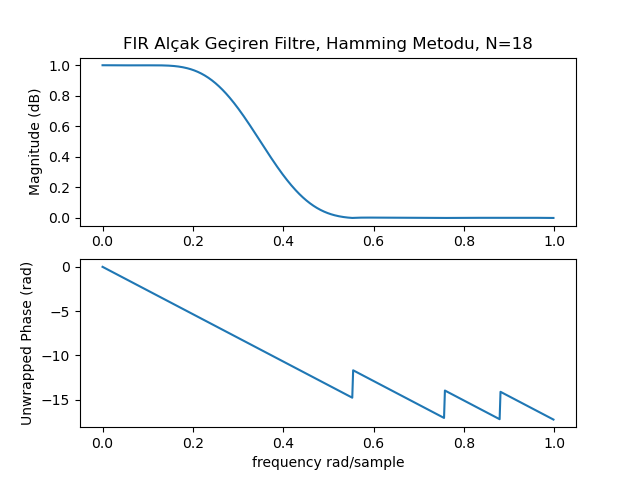

<IPython.core.display.Javascript object>


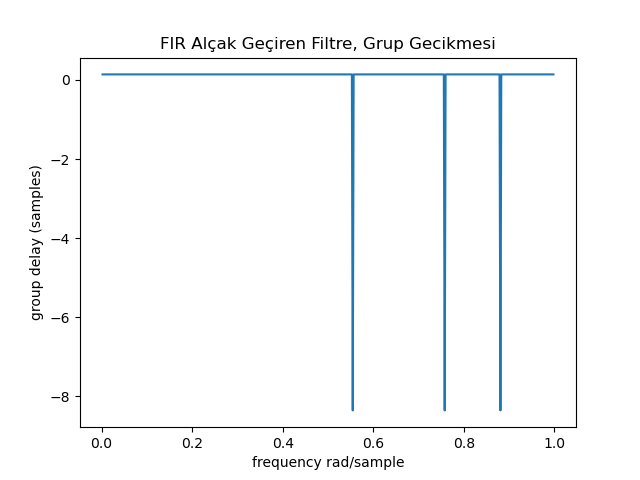

Text(0.5, 0, 'frequency rad/sample')

In [69]:
FIR_LPF = loadmat('Soru2_LPF_Hamming') # Pyfdax'dan alınan bilgiler açıldı
coef_FIR_LPF = FIR_LPF['zpk'].astype(complex) # Coefficientlar alındı
p_FIR_LPF = coef_FIR_LPF[0] # İlk array değerleri p'ye
z_FIR_LPF = coef_FIR_LPF[1] # İkinci array değerleri z'ye atandı

# Fourier dönüşümü ve açısal frekans belirlendi
w_FIR_LPF, Hw_FIR_LPF = sgnl.freqz_zpk(p_FIR_LPF, z_FIR_LPF, 0.00023468)
# Genlik ve Faz değerleri atandı
Hw_FIR_LPF_mag = abs(Hw_FIR_LPF)
Hw_FIR_LPF_phs = np.unwrap(np.angle(Hw_FIR_LPF))

# Grup gecikmesi belirlenndi
N_FIR_LPF = 17
tau_FIR_LPF = -np.diff(Hw_FIR_LPF_phs)*(N_FIR_LPF/(2*np.pi))

# Grafikler Çizdirildi
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('FIR Alçak Geçiren Filtre, Hamming Metodu, N=18')
plt.plot(w_FIR_LPF/np.pi, Hw_FIR_LPF_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w_FIR_LPF/np.pi, Hw_FIR_LPF_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Grup Gecikmesi Grafiği
plt.figure()
plt.title('FIR Alçak Geçiren Filtre, Grup Gecikmesi')
plt.plot(w_FIR_LPF[1::]/np.pi, tau_FIR_LPF)
plt.ylabel('group delay (samples)')
plt.xlabel('frequency rad/sample')

#### Oluşturulan filtre, pyfdax'da gözlenildiği gibi burada da alçak geçiren filtre şeklini almıştır. Kesim frekansı değerinin 0.3pi olması istenilmişti. Bu durumu oluşturmak için alt indisi omega/2pi olan pyfdax'da kesim frekansı değerini '0.15' birim olarak ayarlamıştım. Ayarlarımı böyle yaptığım için w/pi indisine ayarlandığında kesim noktası ve genişlik istenildiği gibi 0.3pi oldu. Kesim noktasında en az -3 dB değer gözlendi.
#### Genlik ve faz grafikleri pyfdax'daki ile aynı olara bulunmuştur.
#### Grup gecikmesi değeri programda daha farklı hesaplanmıştı, fakat pyfdaxda süreksizliği sağlayan nokta atlanılmış ve hesaplamaya dahil edilmemiş. Fark bu durumdan dolayı oluşmaktadır. Faz grafiğinin süreksiz olduğu 7 nokta bulunuyordu, bu noktalar grup gecikmesi grafiğinde de ortaya çıkmıştır. Süreksizlik noktaları hariç grafik beklenildiği gibi lineerdir.

***

***

# Soru - 3

### IIR Yüksek Geçiren Filtre, Chebychev1 Metodu, N = 10

<IPython.core.display.Javascript object>


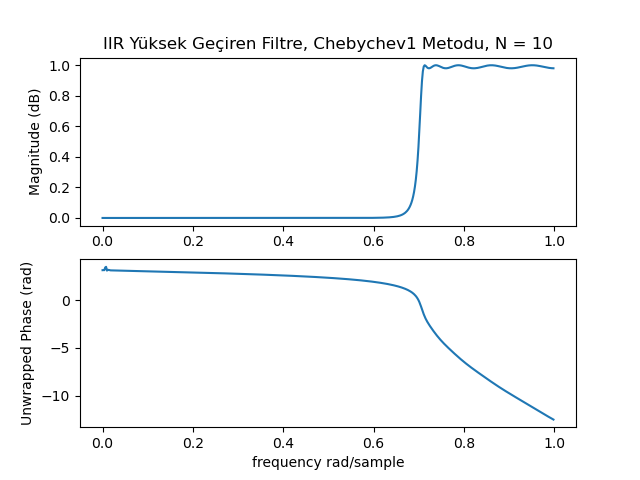

<IPython.core.display.Javascript object>


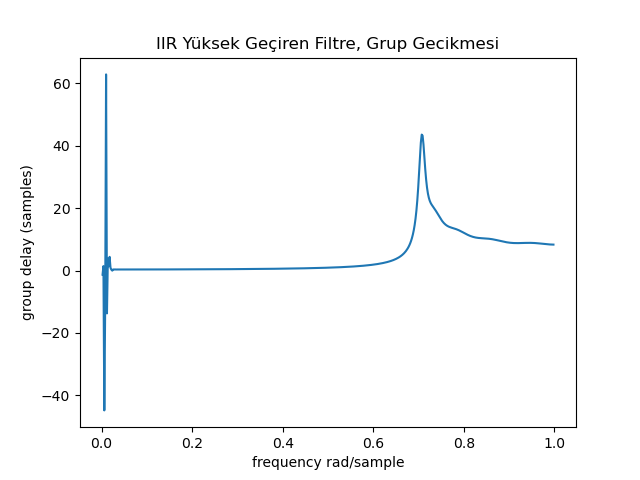

Text(0.5, 0, 'frequency rad/sample')

In [72]:
IIR_HPF = loadmat('Soru3_HPF_Cheby1') # Pyfdax'dan alınan bilgiler açıldı
coef_IIR_HPF = IIR_HPF['ba'].astype(complex) # Coefficientlar alındı
b_IIR_HPF = coef_IIR_HPF[0] # İlk array değerleri b'ye
a_IIR_HPF = coef_IIR_HPF[1] # İkinci array değerleri a'ya atandı

# Fourier dönüşümü ve açısal frekans belirlendi
w_IIR_HPF, Hw_IIR_HPF = sgnl.freqz(b_IIR_HPF,a_IIR_HPF)
# Genlik ve Faz değerleri atandı
Hw_IIR_HPF_mag = abs(Hw_IIR_HPF)
Hw_IIR_HPF_phs = np.unwrap(np.angle(Hw_IIR_HPF))

# Grup gecikmesi belirlenndi
N_IIR_HPF = 1000
tau_IIR_HPF = -np.diff(Hw_IIR_HPF_phs)*(N_IIR_HPF/(2*np.pi))

# Grafikler Çizdirildi
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('IIR Yüksek Geçiren Filtre, Chebychev1 Metodu, N = 10')
plt.plot(w_IIR_HPF/np.pi, Hw_IIR_HPF_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w_IIR_HPF/np.pi, Hw_IIR_HPF_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Grup Gecikmesi Grafiği
plt.figure()
plt.title('IIR Yüksek Geçiren Filtre, Grup Gecikmesi')
plt.plot(w_IIR_HPF[1::]/np.pi, tau_IIR_HPF)
plt.ylabel('group delay (samples)')
plt.xlabel('frequency rad/sample')

#### Oluşturulan filtre, pyfdax'da gözlenildiği gibi burada da yüksek geçiren filtre şeklini almıştır. Daha önceki adımlarda da yaptığım gibi, burada da bant genişliğinin 0.3pi olması için kesim frekansını 0.7pi olarak ayarladım. Belirlediğim kesim frekansında da -3 dB değerini elde edebildim.
#### Genlik ve faz grafikleri pyfdax'daki ile aynı olara bulunmuştur.
#### Süreksiz noktalar dahil edildiği için grafiğin y indisi oranlaması bozulmasına rağmen grafiğin lineer olmadığı gözlenebiliyor. Şekil pyfdax'da elde ettiğim grafikle aynı şekilde sahip ve beklenildiği gibi lineer değil.

***

### IIR Alçak Geçiren Filtre, Butterworth Metodu, N = 7

<IPython.core.display.Javascript object>


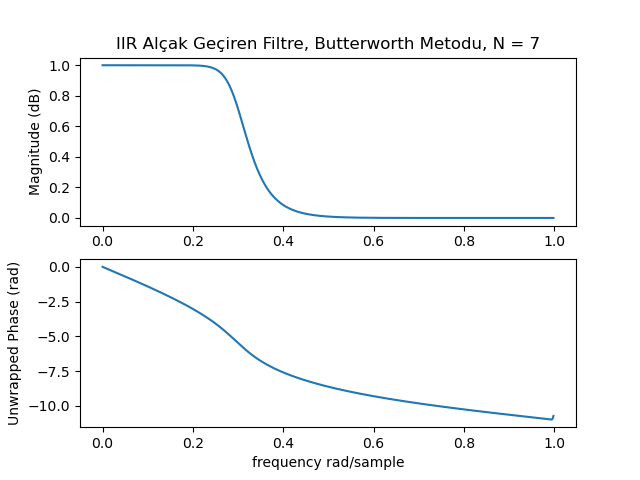

<IPython.core.display.Javascript object>


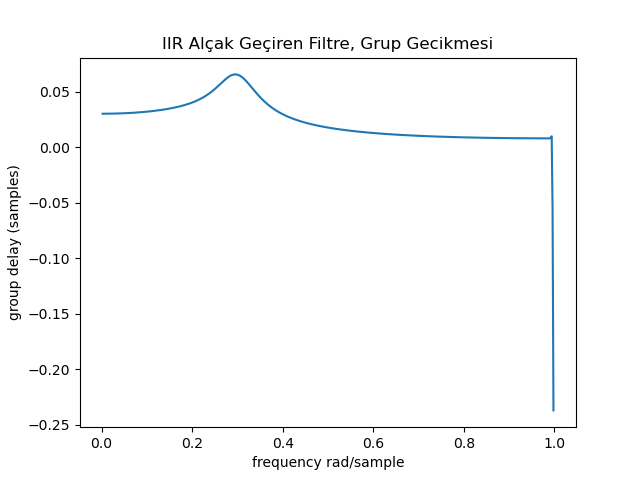

Text(0.5, 0, 'frequency rad/sample')

In [75]:
IIR_LPF = loadmat('Soru3_LPF_Butterworth') # Pyfdax'dan alınan bilgiler açıldı
coef_IIR_LPF = IIR_LPF['ba'].astype(complex) # Coefficientlar alındı
b_IIR_LPF = coef_IIR_LPF[0] # İlk array değerleri b'ye
a_IIR_LPF = coef_IIR_LPF[1] # İkinci array değerleri a'ya atandı

# Fourier dönüşümü ve açısal frekans belirlendi
w_IIR_LPF, Hw_IIR_LPF = sgnl.freqz(b_IIR_LPF,a_IIR_LPF)
# Genlik ve Faz değerleri atandı
Hw_IIR_LPF_mag = abs(Hw_IIR_LPF)
Hw_IIR_LPF_phs = np.unwrap(np.angle(Hw_IIR_LPF))

# Grup gecikmesi belirlenndi
N_IIR_LPF = 7
tau_IIR_LPF = -np.diff(Hw_IIR_LPF_phs)*(N_IIR_LPF/(2*np.pi))

# Grafikler Çizdirildi
# Genlik ve Faz Grafikleri
plt.figure()
plt.subplot(2,1,1)
plt.title('IIR Alçak Geçiren Filtre, Butterworth Metodu, N = 7')
plt.plot(w_IIR_LPF/np.pi, Hw_IIR_LPF_mag)
plt.ylabel('Magnitude (dB)')
plt.subplot(2,1,2)
plt.plot(w_IIR_LPF/np.pi, Hw_IIR_LPF_phs)
plt.ylabel('Unwrapped Phase (rad)') 
plt.xlabel('frequency rad/sample')
# Grup Gecikmesi Grafiği
plt.figure()
plt.title('IIR Alçak Geçiren Filtre, Grup Gecikmesi')
plt.plot(w_IIR_LPF[1::]/np.pi, tau_IIR_LPF)
plt.ylabel('group delay (samples)')
plt.xlabel('frequency rad/sample')

#### Oluşturulan filtre, pyfdax'da gözlenildiği gibi burada da alçak geçiren filtre şeklini almıştır. Kesim frekansı değerinin 0.3pi olması istenilmişti. Bu durumu oluşturmak için alt indisi omega/2pi olan pyfdax'da kesim frekansı değerini '0.15' birim olarak ayarlamıştım. Ayarlarımı böyle yaptığım için w/pi indisine ayarlandığında kesim noktası ve genişlik istenildiği gibi 0.3pi oldu. 
#### Genlik ve faz grafikleri pyfdax'daki ile aynı olara bulunmuştur. Kesim noktasında -3 dB değeri elde edilmiştir.
#### Grup gecikmesinin şekli programda daha düzgün gözükmekte fakat benim sonucumda da yakınlaştırıldığında aynı lineer olmayan şekil gözleniyor. Grafiğin genişletilmiş halinde belli olmamasının sebebi, süreksizlik durumu yaratan değerin yüksek çıkması ve grafiğin y ekseni oranını bozmasıdır. Büyük halinde grafiğe dikkatli bakıldığında ufak bir tepe oluşumu gözleniyor, yakınlaştırıldığında bu şeklin pyfdax'da gözlemlediğimle aynı olduğunu kontrol ettim ve onayladı. Grup gecikmesi grafiği beklenildiği gibi lineer gelmemiştir.

***

***

# Soru - 4

### FIR Bant Geçiren Filtre, Barthann Metodu, N = 42
#### FIR Filtreleri oluştururken zpk değerlerini kullanarak oluşturduğum için bu değerleri kullanarak ba değerlerini elde etmem gerekli

<IPython.core.display.Javascript object>


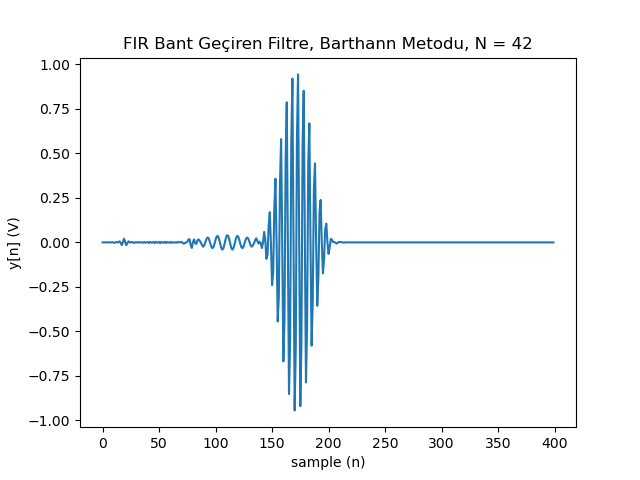

Text(0, 0.5, 'y[n] (V)')

In [77]:
b_FIR_BPF, a_FIR_BPF = sgnl.zpk2tf(p_FIR_BPF, z_FIR_BPF, 0.000390942)
Y_FIR_BPF = sgnl.lfilter(b_FIR_BPF, a_FIR_BPF, xn)
plt.figure()
plt.title('FIR Bant Geçiren Filtre, Barthann Metodu, N = 42')
plt.plot(Y_FIR_BPF.real)
plt.xlabel('sample (n)')
plt.ylabel('y[n] (V)')

### Bant geçiren filtre istenildiği gibi çalışmıştır. Beklediğimiz gibi aralıkta frekansları geçirmiştir. Yüksek ve alçak geçiren filtrelerle çıkış sinyalini karşılaştırdığımızda frekansların farklı olduğu ve ikisinin arasında değerler olduğu gözlenebiliyor.
### Bu filtrenin grup gecikmesi oldukça yüksek geldi.

***

### IIR Yüksek Geçiren Filtre, Chebychev1 Metodu, N = 10

<IPython.core.display.Javascript object>


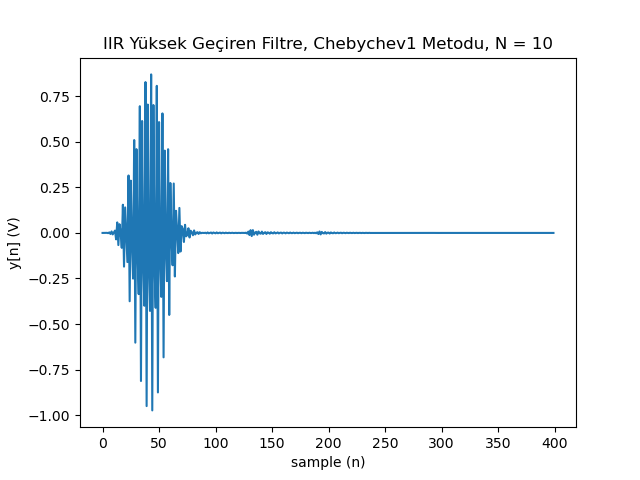

Text(0, 0.5, 'y[n] (V)')

In [83]:
Y_IIR_HPF = sgnl.lfilter(b_IIR_HPF, a_IIR_HPF, xn)
plt.figure()
plt.title('IIR Yüksek Geçiren Filtre, Chebychev1 Metodu, N = 10')
plt.plot(Y_IIR_HPF.real)
plt.xlabel('sample (n)')
plt.ylabel('y[n] (V)')

### Yüksek geçiren filtre beklenildiği gibi çalışmıştır. Bant ve Alçak geçiren filtre sonuçları ile karşılaştırıldığında daha yüksek frekanstaki bir sinyal geçirdiği gözlenebilmektedir.
### Grup gecikmesi düşük bir miktardadır ve sinyal örnek sayısı olarak ciddi bir miktarda gecikmemiştir.
### Aralarında en iyi filtrenin bu olduğunu düşünüyorum

***

### FIR Alçak Geçiren Filtre, Hamming Metodu, N = 18
#### FIR Filtreleri oluştururken zpk değerlerini kullanarak oluşturduğum için bu değerleri kullanarak ba değerlerini elde etmem gerekli

<IPython.core.display.Javascript object>


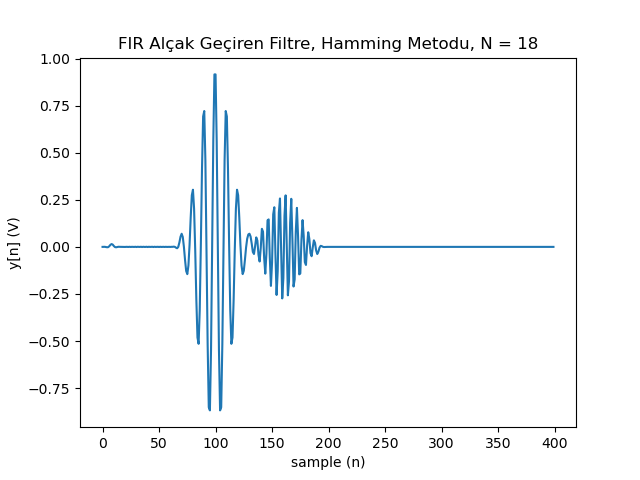

Text(0, 0.5, 'y[n] (V)')

In [84]:
b_FIR_LPF, a_FIR_LPF = sgnl.zpk2tf(p_FIR_LPF, z_FIR_LPF, 0.00023468)
Y_FIR_LPF = sgnl.lfilter(b_FIR_LPF, a_FIR_LPF, xn)
plt.figure()
plt.title('FIR Alçak Geçiren Filtre, Hamming Metodu, N = 18')
plt.plot(Y_FIR_LPF.real)
plt.xlabel('sample (n)')
plt.ylabel('y[n] (V)')

### IIR Alçak Geçiren Filtre, Butterworth Metodu, N = 7

<IPython.core.display.Javascript object>


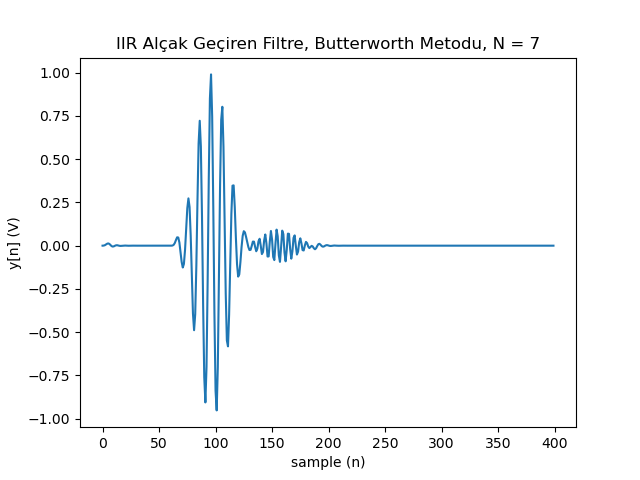

Text(0, 0.5, 'y[n] (V)')

In [86]:
Y_IIR_LPF = sgnl.lfilter(b_IIR_LPF, a_IIR_LPF, xn)
plt.figure()
plt.title('IIR Alçak Geçiren Filtre, Butterworth Metodu, N = 7')
plt.plot(Y_IIR_LPF.real)
plt.xlabel('sample (n)')
plt.ylabel('y[n] (V)')

### İki alçak geçiren filtre de beklenildiği gibi çalıştı. Bant ve yüksek geçiren filtrelerle karşılaştırıldığında daha düşük frekansta değerleri geçirdiği gözlendi.
### İki alçak geçiren filtreyi karşılaştırdığımızda, IIR alçak filtrenin daha iyi çalıştığını düşünüyorum. Bunun sebebi alçak geçiren filtrenin kesim frekansı ötesinde daha az bir gürültü olmasıdır.